In [1]:
#Shared/Utility scripts
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
from shared_scripts import Reach_Eval
import os
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")
#set path directory
HOME = os.path.expanduser('~')
cwd = os.getcwd()

In [2]:
#Put in model of interest for evaluation, NWIS/USGS site id(s), and the start/end date

model = 'MLP'
year = 2020
#get NWIS ids from prediction file
with open(f"{HOME}/NWM_ML/Predictions/Hindcast/{model}/{year}/{model}_predictions.pkl", "rb") as f:
    # Decompress data from file
    predictions = pkl.load(f)
NWIS_list = list(predictions.keys())
#plot list of top performing sites
Eval_Metric = 'KGE'
startDT ='2020-1-01'
endDT ='2020-9-20'

Reach_Eval = Reach_Eval.Reach_Eval(model , NWIS_list, startDT, endDT, cwd)

#Get Streamstats and colocated NHD reaches
Reach_Eval.get_NHD_Model_info()

#Get USGS and NWM data
Reach_Eval.prepare_comparison()

Getting geospatial information for NHD reaches


Dropping USGS sites with no NHD reach
Getting  MLP  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


In [3]:
#Plot the locations
Reach_Eval.Map_Plot_Eval('D', supply = False)

Plotting monitoring station locations


,NWIS_site_id,NHD_reachid,Location,RMSE,MaxError,MAPE,KGE,Drainage_area_mi2,Mean_Basin_Elev_ft,Perc_Forest,Perc_Imperv,Perc_Herbace,Mean_Ann_Precip_in,Ann_low_cfs,Ann_mean_cfs,Ann_hi_cfs
0,10171000,10390290,"JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT",4278,5448,18.860641,0.860981,3430.0000,6440.0,41.7,4.37000,6.35,21.4,100.900,138.0,225.2
1,10134500,10277268,"EAST CANYON CREEK NEAR MORGAN, UT",4557,6694,102.508863,0.724502,152.0000,7090.0,60.9,1.65000,4.68,25.8,18.700,60.0,148.4
2,10153100,10348934,"HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH",2724,3581,26.148416,0.690904,NaN,NaN,NaN,NaN,NaN,NaN,20.100,39.0,99.9
3,10137500,10274270,"SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT",8199,12157,30.456657,0.680916,137.0000,7220.0,26.3,0.02530,21.90,35.5,32.600,115.0,259.2
4,10164500,10329013,AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK...,3858,5246,72.797802,0.613898,51.1000,8470.0,71.5,0.01730,3.42,39.4,16.800,53.0,111.8
5,10105900,666170,"LITTLE BEAR RIVER AT PARADISE, UT",8128,14162,24.679563,0.558770,180.0000,6700.0,20.5,0.06530,18.90,33.2,27.800,86.0,199.8
6,10126000,4605050,"BEAR RIVER NEAR CORINNE, UT",191417,235758,41.559347,0.509953,7040.0000,6620.0,15.6,0.55000,15.20,22.2,402.500,1581.0,4989.0
7,10133650,10276856,"E CANYON CR BL I-80 REST STOP NR PARK CITY, UT",2539,3578,46.164126,0.507082,42.1000,7620.0,65.7,2.80000,3.05,24.1,9.240,19.0,44.6
8,10133980,10276712,"EAST CANYON CREEK AB EAST CYN RES NR MORGAN, UTAH",7297,9897,45.759928,0.409413,115.0000,7240.0,65.5,2.13000,3.45,26.4,24.900,46.0,127.4
9,10149000,10349162,"SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT",3522,5243,36.312902,0.348139,15.3000,7600.0,56.0,0.03720,3.78,27.2,19.400,33.0,50.1


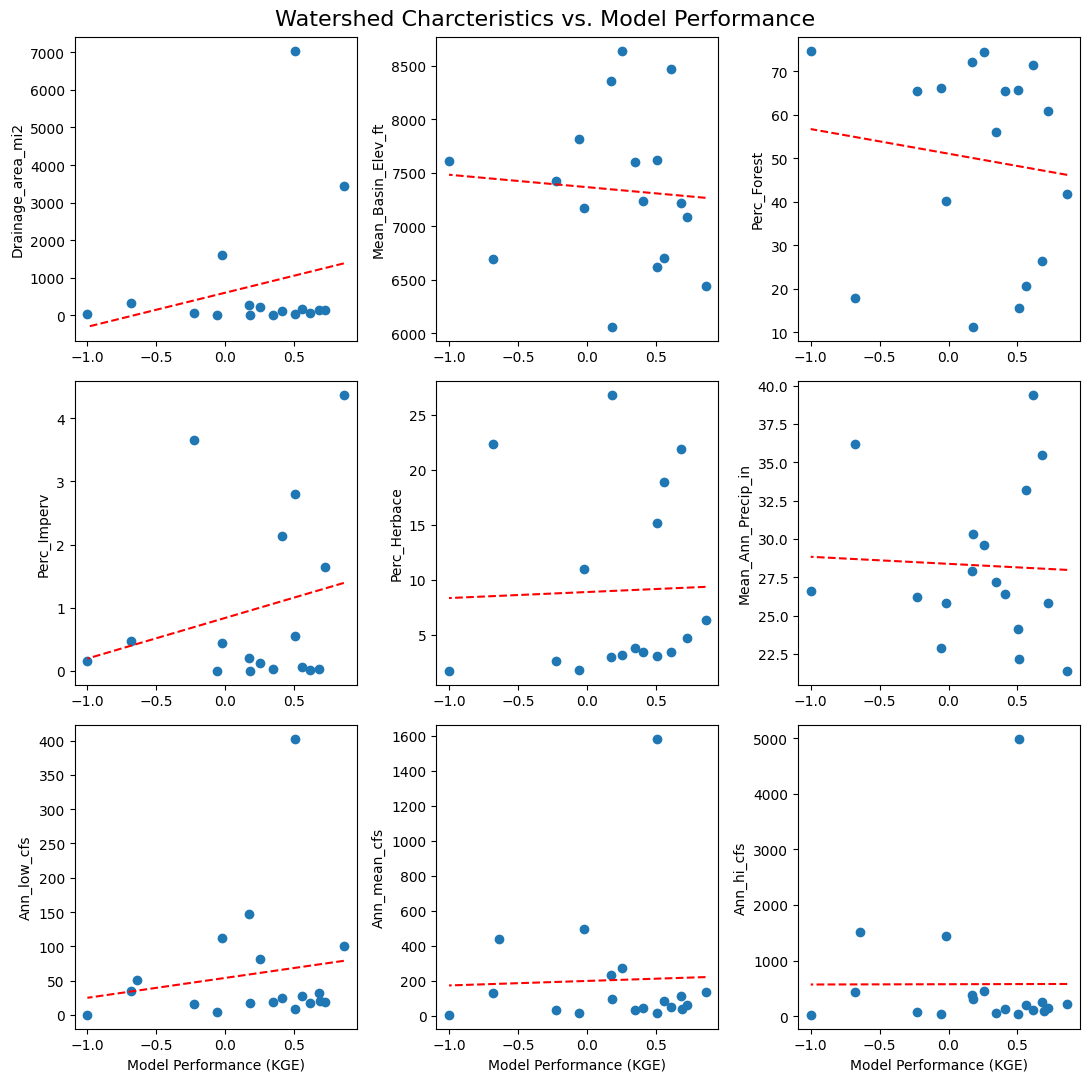

JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT


,USGS: 10171000,MLP: 10390290
Datetime,,
2020-01-31,7238.652307,11588.319966
2020-02-29,14086.060777,18884.732701
2020-03-31,20102.674854,25550.944082
2020-04-30,28805.896619,33251.365485
2020-05-31,39346.491793,44485.827529
2020-06-30,49387.180897,53758.017648
2020-07-31,60637.091066,59928.918408
2020-08-31,70970.442375,67161.990307
2020-09-30,77681.368779,74101.218907


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10171000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10390290  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK NEAR MORGAN, UT


,USGS: 10134500,MLP: 10277268
Datetime,,
2020-01-31,691.063106,2722.424943
2020-02-29,1363.874349,5899.540407
2020-03-31,4295.944332,9973.955038
2020-04-30,10160.557365,15428.559066
2020-05-31,12204.925012,18898.775088
2020-06-30,17304.804364,22302.991408
2020-07-31,24327.103162,25878.783465
2020-08-31,32077.637959,29223.940697
2020-09-30,35792.106764,31120.306303


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10134500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10277268  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH


,USGS: 10153100,MLP: 10348934
Datetime,,
2020-01-31,1686.035423,1183.070632
2020-02-29,3437.480931,2302.987459
2020-03-31,5513.541388,3871.746822
2020-04-30,7586.786471,5821.450977
2020-05-31,11713.306019,8132.550388
2020-06-30,13617.793257,10054.842887
2020-07-31,14922.972468,11519.728643
2020-08-31,16289.444359,12886.699651
2020-09-30,17235.696430,13956.385010


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10153100 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10348934  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT


,USGS: 10137500,MLP: 10274270
Datetime,,
2020-01-31,1955.532783,3244.745883
2020-02-29,3992.262636,6427.634088
2020-03-31,10333.489704,10253.873603
2020-04-30,23711.551409,15712.399940
2020-05-31,38118.379124,25961.566434
2020-06-30,42512.740229,33090.385802
2020-07-31,47127.478667,37812.042066
2020-08-31,51589.263823,41503.076962
2020-09-30,53924.151278,43515.604010


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10137500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10274270  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK, UT


,USGS: 10164500,MLP: 10329013
Datetime,,
2020-01-31,795.019815,1724.171461
2020-02-29,1537.203013,3488.166441
2020-03-31,2426.929609,5867.238592
2020-04-30,4018.309825,8753.898325
2020-05-31,9089.445977,14335.900767
2020-06-30,14439.949699,18554.413451
2020-07-31,17520.591150,20898.684261
2020-08-31,18737.158646,22812.509902
2020-09-30,19341.434518,24088.147418


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10164500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10329013  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

LITTLE BEAR RIVER AT PARADISE, UT


,USGS: 10105900,MLP: 666170
Datetime,,
2020-01-31,2917.602374,3617.985802
2020-02-29,5604.102586,7518.467917
2020-03-31,13180.529383,14105.408991
2020-04-30,23232.459126,25792.854071
2020-05-31,31573.748078,36174.242305
2020-06-30,33573.728193,42021.895072
2020-07-31,34842.559072,45793.148798
2020-08-31,35969.657016,49006.243632
2020-09-30,36777.952975,50940.057199


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10105900 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_666170    :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

BEAR RIVER NEAR CORINNE, UT


,USGS: 10126000,MLP: 4605050
Datetime,,
2020-01-31,89206.495168,50094.329714
2020-02-29,181723.304248,99877.846705
2020-03-31,338843.830101,160606.242401
2020-04-30,456117.623388,220964.626676
2020-05-31,531465.098664,295707.162816
2020-06-30,589257.764805,369328.203946
2020-07-31,615152.913974,402720.448455
2020-08-31,630196.486154,422920.814991
2020-09-30,645985.662964,440000.323614


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10126000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_4605050   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

E CANYON CR BL I-80 REST STOP NR PARK CITY, UT


,USGS: 10133650,MLP: 10276856
Datetime,,
2020-01-31,752.027819,72.880057
2020-02-29,1450.434265,476.947182
2020-03-31,3288.410695,1642.136605
2020-04-30,4945.897111,3623.559601
2020-05-31,7309.277827,4896.386808
2020-06-30,8609.365265,5467.750910
2020-07-31,9109.560885,5693.439175
2020-08-31,9394.365128,5930.812977
2020-09-30,9570.953550,5993.180834


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133650 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10276856  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK AB EAST CYN RES NR MORGAN, UTAH


,USGS: 10133980,MLP: 10276712
Datetime,,
2020-01-31,1773.429510,835.702515
2020-02-29,3575.574989,2045.831775
2020-03-31,7937.982884,3955.133937
2020-04-30,12847.601736,6511.055623
2020-05-31,18147.410901,8940.602756
2020-06-30,20840.979717,10943.930700
2020-07-31,21926.589593,12564.709191
2020-08-31,22596.829130,13832.437389
2020-09-30,23068.709180,14537.888356


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133980 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10276712  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT


,USGS: 10149000,MLP: 10349162
Datetime,,
2020-01-31,1410.438751,1671.231122
2020-02-29,2707.459208,3288.829092
2020-03-31,4216.186526,5340.881062
2020-04-30,5774.850911,7763.687089
2020-05-31,7373.510392,10660.077155
2020-06-30,8850.221568,13109.838527
2020-07-31,10231.600045,15090.471880
2020-08-31,11623.232276,16720.752489
2020-09-30,12576.348830,17819.423748


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10349162  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

PROVO RIVER NEAR HAILSTONE, UT


,USGS: 10155000,MLP: 10373622
Datetime,,
2020-01-31,5261.741773,3048.677470
2020-02-29,10299.652399,6189.503346
2020-03-31,17949.000150,10074.171609
2020-04-30,34054.570796,14678.711928
2020-05-31,134463.094834,50373.795776
2020-06-30,173327.601455,78831.442686
2020-07-31,176631.665710,85169.070909
2020-08-31,178623.824675,88676.576938
2020-09-30,180350.468222,90550.629211


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10373622  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT


,USGS: 10140100,MLP: 10275828
Datetime,,
2020-01-31,654.111754,2252.798417
2020-02-29,1292.842253,4737.371134
2020-03-31,2311.061116,8141.803972
2020-04-30,3778.313796,13502.128841
2020-05-31,7729.757337,22203.253865
2020-06-30,12132.172271,26808.928642
2020-07-31,17578.095488,30517.751548
2020-08-31,25647.000916,33587.223311
2020-09-30,27794.263576,35186.172691


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140100 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10275828  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT


,USGS: 10155200,MLP: 10373794
Datetime,,
2020-01-31,7368.352917,4009.490851
2020-02-29,14185.378951,8684.358814
2020-03-31,21548.795003,15642.638811
2020-04-30,30550.912692,23636.304104
2020-05-31,81167.028760,35349.251419
2020-06-30,120696.790634,49405.068197
2020-07-31,138994.531849,58372.144731
2020-08-31,152311.760804,64419.154294
2020-09-30,161697.733605,67145.410240


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155200 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10373794  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER AT GATEWAY, UT


,USGS: 10136500,MLP: 10274616
Datetime,,
2020-01-31,3647.653783,26690.999725
2020-02-29,8108.565134,60844.655158
2020-03-31,32163.324226,103703.214983
2020-04-30,60290.113753,150956.934557
2020-05-31,87034.834833,187430.267854
2020-06-30,109331.046522,212572.689200
2020-07-31,132278.632385,231191.012803
2020-08-31,155969.409309,248329.988087
2020-09-30,168472.658031,259284.518131


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10136500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10274616  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SALT CRK BL NEPHI POWERPLANT DIV NR NEPHI, UT


,USGS: 10145400,MLP: 10331031
Datetime,,
2020-01-31,615.845438,1295.256057
2020-02-29,1137.693371,2321.762581
2020-03-31,1377.143925,3481.612302
2020-04-30,1641.233257,4932.420218
2020-05-31,3420.909666,6451.712803
2020-06-30,4410.971986,7643.518790
2020-07-31,5033.518310,8556.839992
2020-08-31,5461.182010,9427.763258
2020-09-30,5687.696794,10154.601503


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10145400 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10331031  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK NEAR JEREMY RANCH, UT


,USGS: 10133800,MLP: 10276836
Datetime,,
2020-03-31,6334.029570,344.696121
2020-04-30,10083.698704,1554.136629
2020-05-31,14191.022555,2086.318742
2020-06-30,16177.839822,2086.318742
2020-07-31,17044.702886,2086.318742
2020-08-31,17565.242472,2086.318742
2020-09-30,17897.063235,2086.318742


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133800 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10276836  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER NEAR PLAIN CITY, UT


,USGS: 10141000,MLP: 10273232
Datetime,,
2020-01-31,12061.275203,32098.477306
2020-02-29,34508.457025,71512.884462
2020-03-31,66769.574062,116479.786702
2020-04-30,91441.946325,165257.159595
2020-05-31,97910.994276,202394.380848
2020-06-30,104240.773670,223600.477570
2020-07-31,108541.181853,237404.594162
2020-08-31,111863.213701,249938.212766
2020-09-30,116654.945259,259373.417489


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10141000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10273232  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

OGDEN RIVER NR GIBSON AVENUE AT OGDEN, UT


,USGS: 10140700,MLP: 10274376
Datetime,,
2020-01-31,3178.656033,18270.821811
2020-02-29,16964.802540,45034.190626
2020-03-31,28900.078734,77588.058825
2020-04-30,36538.757915,105188.377062
2020-05-31,44301.017241,115942.987264
2020-06-30,51000.170039,124241.924637
2020-07-31,57660.263480,130448.501421
2020-08-31,65129.916667,135333.391167
2020-09-30,68331.226427,138019.768767


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140700 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10274376  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

DANIELS CREEK AT CHARLESTON, UT


,USGS: 10157500,MLP: 10375690
Datetime,,
2020-01-31,25.701939,1791.100335
2020-02-29,83.741757,3571.455643
2020-03-31,228.798577,6157.846195
2020-04-30,383.055568,9303.398165
2020-05-31,585.009808,13136.675439
2020-06-30,710.835175,16466.074157
2020-07-31,751.713701,19295.651319
2020-08-31,762.729770,21683.503758
2020-09-30,766.056459,23060.178642


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10157500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.MLP_colon_10375690  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (MLP Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [4]:
#Holoviews plots.
freq = 'M'
Reach_Eval.Interactive_Model_Eval(freq, supply =True)